# Lab 7: Event Selection Optimization

In [94]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

plt.rcParams["figure.figsize"] = (20,15)

# open the file of interest, and use pickle loading
file1 = open ("../higgs_100000_pt_1000_1200.pkl",'rb')
higgs_data = pickle.load(file1)

# background dataset
file2 = open ("../qcd_100000_pt_1000_1200.pkl",'rb')
qcd_data = pickle.load(file2)

In each pT sample we have, there are dedicated training samples for event selection optimization. All studies should be carried out by normalizing Higg and QCD samples in each pT sample to give expected yields accordingly. 

### 1) Make a stacked histogram plot for the feature variable: mass

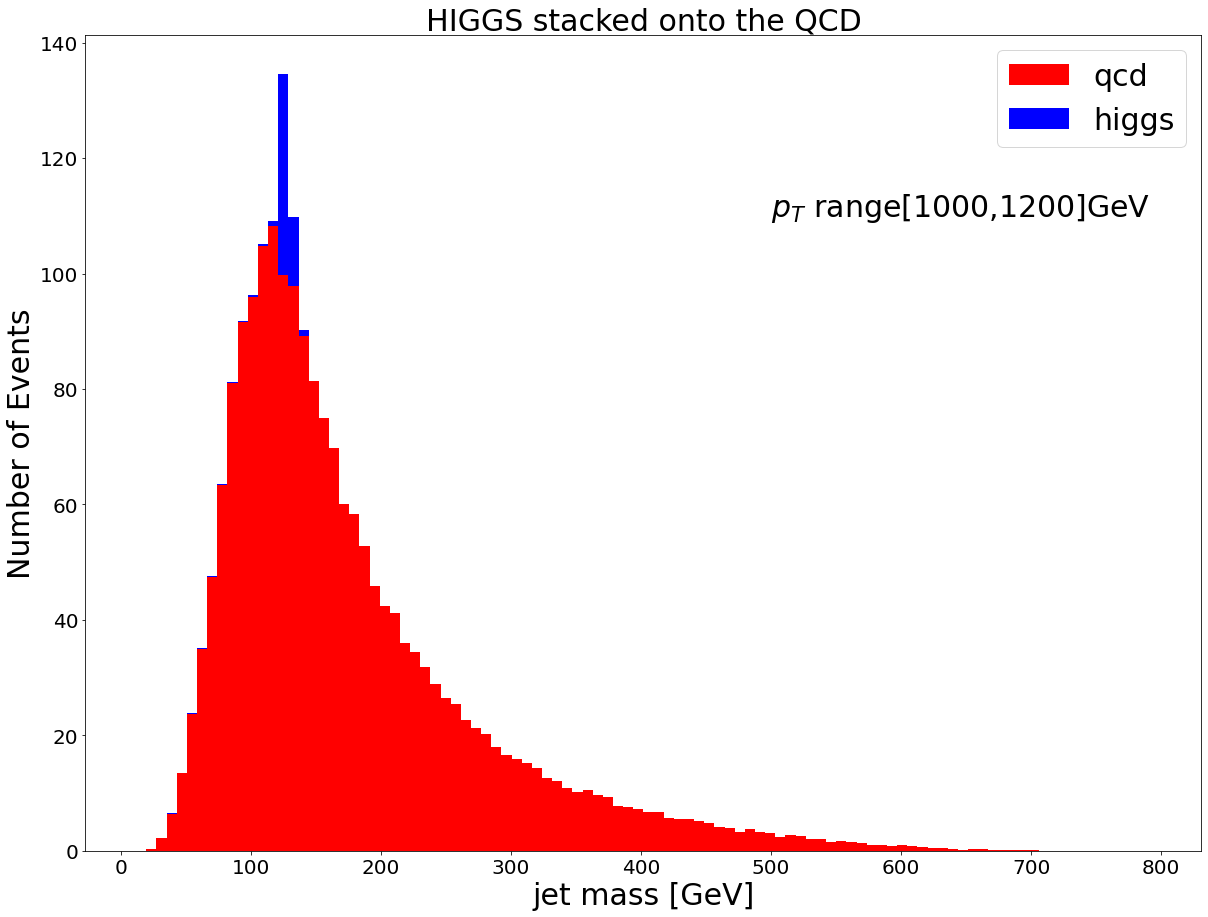

In [95]:
both_mass = [qcd_data['mass'], higgs_data['mass']]
colors = ['red','blue']
weight_higgs = np.array([50/100000]*len(higgs_data))
weight_qcd = np.array([2000/100000]*len(qcd_data))
weights = [weight_qcd,weight_higgs]
plt.hist(both_mass,stacked=True,weights=weights,color=colors,bins=100,label=['qcd', 'higgs'])


plt.tick_params(axis='both', labelsize=20)
plt.xlabel('jet mass [GeV]',size=30)
plt.ylabel('Number of Events',size=30)
plt.legend(loc="upper right",fontsize=30)
plt.text(500,110,'$p_{T}$ range[1000,1200]GeV',size=30)
plt.title('HIGGS stacked onto the QCD',size=30)
plt.show()

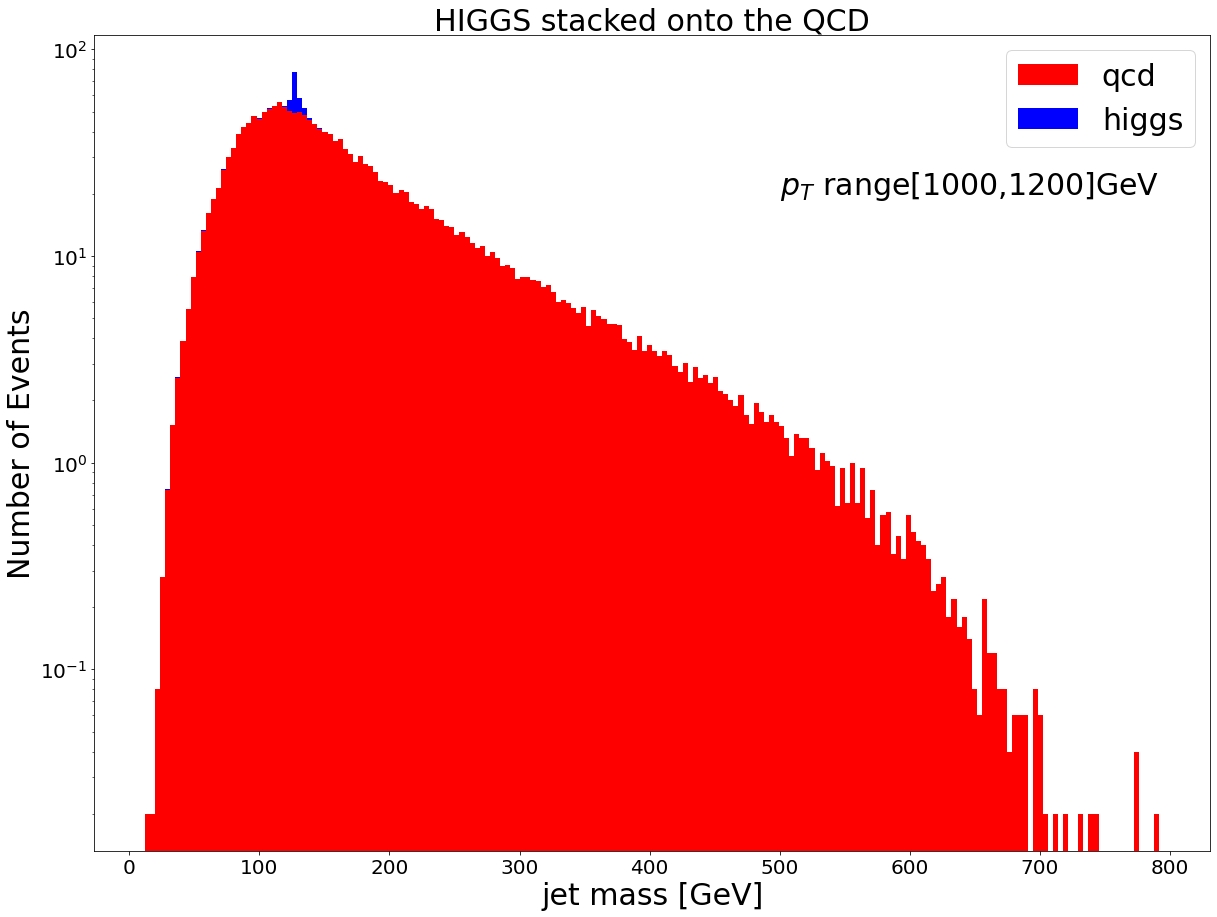

In [96]:
both_mass = [qcd_data['mass'], higgs_data['mass']]
colors = ['red','blue']
weight_higgs = np.array([50/100000]*len(higgs_data))
weight_qcd = np.array([2000/100000]*len(qcd_data))
weights = [weight_qcd,weight_higgs]
plt.hist(both_mass,stacked=True,weights=weights,color=colors,bins=200,label=['qcd', 'higgs'], )


plt.tick_params(axis='both', labelsize=20)
plt.xlabel('jet mass [GeV]',size=30)
plt.ylabel('Number of Events',size=30)
plt.legend(loc="upper right",fontsize=30)
plt.text(500,20,'$p_{T}$ range[1000,1200]GeV',size=30)
plt.title('HIGGS stacked onto the QCD',size=30)
plt.yscale('log') 
plt.show()

Now we'll use Poisson statistics for significant calculation

In [97]:
N_higgs = 50; N_qcd = 2000; N_both = N_higgs+N_qcd
exact_significance=stats.norm.ppf(stats.poisson.cdf(N_both,N_qcd))
print('Exact Significance: '+ str(exact_significance))

approx = N_higgs/np.sqrt(N_qcd)
difference = exact_significance - approx;
print('Approximated Significance: ' + str(approx))

print('|Difference|: ' + str(abs(difference)) )



Exact Significance: 1.1282230087754428
Approximated Significance: 1.118033988749895
|Difference|: 0.01018902002554789


Comparing the exact significance and the approximation, we see that there is a slight different. Negliiblie I'd say.

### 2) Identifying mass cuts to optimize the expected significance

Here's there steps we must take: First we try systematically making different mass cuts, we then evaluate the expected significance for each set of mass cuts, and finally we identify the set of mass cuts which give the highest signifigance.

To start making the cut, we can start simply by looking at the plot above and choose values in the region where the peak of the signal happpens. We then change these values systematically and calculate the expected significance each to to find the optimal cut.

In [98]:
signal_peak = higgs_data['mass'].max()

In [99]:
# cut 1
stu = 5
def make_cut(min, max):
    signal_filter = (higgs_data['mass'] > min) & (higgs_data['mass'] < max)
    signal_cut = higgs_data[signal_filter]

    bkg_filter = (qcd_data['mass'] > min) & (qcd_data['mass'] < max)
    bkg_cut = qcd_data[bkg_filter]

    signal = N_higgs * len(signal_cut)/len(higgs_data)
    bkg = N_qcd * len(bkg_cut)/len(qcd_data)

    N_higgs_new = signal
    N_qcd_new = bkg
    N_both_new =  N_higgs_new + N_qcd_new
    
    return stats.norm.ppf(stats.poisson.cdf(N_both_new, N_qcd_new))

In [100]:
print('Expected Significance: ' + str(make_cut(80,signal_peak)))
print('Expected Significance: ' + str(make_cut(90,signal_peak)))
print('Expected Significance: ' + str(make_cut(100,signal_peak)))
print('Expected Significance: '+ str(make_cut(115,signal_peak)))
print('Expected Significance: '+ str(make_cut(120,signal_peak)))
print('Expected Significance: '+ str(make_cut(125,signal_peak)))
print('Expected Significance: '+ str(make_cut(124,signal_peak)))
print('Expected Significance: '+ str(make_cut(123,signal_peak)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-1)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-2)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-3)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-4)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-5)))

# test
print('Expected Significance: '+ str(make_cut(124,signal_peak+5)))

# back to it
print('Expected Significance: '+ str(make_cut(124,signal_peak-20)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-19)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-21)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-22)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-23)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-24)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-30)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-25)))
print('Expected Significance: '+ str(make_cut(124,signal_peak-26)))
print(signal_peak-25)
print('Expected Significance: '+ str(make_cut(124,129.6)))
print('Expected Significance: '+ str(make_cut(124,130)))

Expected Significance: 1.6461316265902142
Expected Significance: 1.7523010795094742
Expected Significance: 1.892512936298203
Expected Significance: 2.175060717424869
Expected Significance: 2.347955380461454
Expected Significance: 2.3334963764638164
Expected Significance: 2.459196270747121
Expected Significance: 2.4457413483702948
Expected Significance: 2.486643390782473
Expected Significance: 2.505268089932995
Expected Significance: 2.5761209466376727
Expected Significance: 2.585449873042154
Expected Significance: 2.6517563595070146
Expected Significance: 2.2986276909550294
Expected Significance: 3.672216318045824
Expected Significance: 3.547725019826
Expected Significance: 3.724834800042897
Expected Significance: 3.8162688076724587
Expected Significance: 3.8463038964098653
Expected Significance: 3.912972906694857
Expected Significance: 0.22691642234940088
Expected Significance: 4.013279067577894
Expected Significance: 3.8983727699634287
129.6136749993263
Expected Significance: 3.92792

Looking at the results above, we see that in the region of mass between 124 and the (signal_peak - 25) gives the us the highest expected significance. Let's round and say between 124 and 130

In [101]:
print('A cut of mass between 124 and 130 gives us the highest expected significance: ' + str(make_cut(124,130)))

A cut of mass between 124 and 130 gives us the highest expected significance: 3.993622369521206
